In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Cargar el conjunto de datos

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['target'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.target.unique()

array([0, 1, 2])

In [ ]:
df.isnull().sum().sort_values(ascending=True).head()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


# Conjuntos de entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el Modelo

In [ ]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

# Realizar la predicción

In [ ]:
y_pred = model.predict(X_test)

# Evaluando el modelo

In [ ]:
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Visualizar la separación de clases

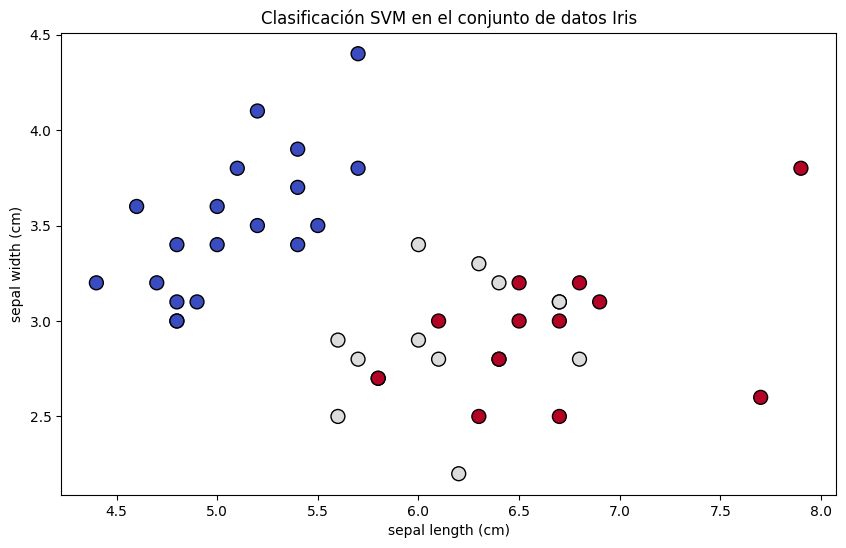

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', edgecolor='k', s=100)
plt.title('Clasificación SVM en el conjunto de datos Iris')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()